# MML ASSIGNMENT

![](https://junnei.github.io/mml/assets/images/logo.png)

## 회귀(Regression)의 정의

- 이번 챕터에서는 이전 Chapter 2, 5, 6, 7 개념을 이용하여 선형회귀(Linear Regression) 또는 곡선 피팅(curve fitting)에 대해서 다룰 것이다. 

- **회귀(Regression)**는 $x \in \mathbb{R}^d$ 를 만족하는 입력 $x$를 $f(x) \in R$에 맵핑하는 함수 $f$를 찾는 것을 목표로 한다. 

- 이 챕터에서는 $x_n$이 훈련 세트(training Set)로 주어지고
- 이에 상응하는 잡음(noise)가 섞인 관측 $y_n = f(x_n)+\epsilon$이 주어졌다고 가정한다. 

- 이 챕터 전체에서 평균이 0인 가우시안 노이즈(Gaussian Noise)를 가정한다. 회귀 모델의 목적은 단순히 훈련 데이터에 대해 모델링할 뿐만이 아니라 훈련 데이터에 주어지지 않은 값에 대해서도 잘 예측할 수 있도록 설계 하는 것이다.(Chapter 8 참고)

## 필요한 library import

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Exercise 1. 선형 회귀 함수 만들기(Linear Regression)

다음을 만족하는 $x,y$가 있다고 가정하자
$$
p(y|x,\theta) = \mathcal{N}(y|f(x), \sigma^2)
$$

여기서 입력은 $x \in R_D$ 을 만족하고 $y \in R$ 로 노이즈가 섞인 함수값이며 타겟(target)이다.
우도함수를 이용하여, x와 y의 함수적 관계를 표현한 식은 아래와 같다.

$$
y = f (x) + \epsilon
$$

$\epsilon \sim \mathcal{N}(0,\sigma^2)$는 독립이며, 평균이 0이고 분산이 $\sigma^2$인 가우시안 분포를 따른다. 회귀의 목적은 정확한 데이터를 생산하고 일반화 시키는 $f$와 가장 가까운 혹은 비슷한 함수를 찾는 것이다. 즉, 함수를 통해 주어진 데이터를 생산할 수 있어야하고, 해당 함수는 그러한 데이터를 잘 일반화한 형태여야 된다는 것을 의미한다. 

그리고 이러한 형태의 꼴로 나타낼 수 있는 선형회귀 함수를 주어진 데이터를 이용해 만들어보자

### Exercise 1.1 

선형회귀 식은 다음과 같다.

$$
y = \theta X + b
$$

주어진 데이터를 이용하여 함수를 표현해보자.

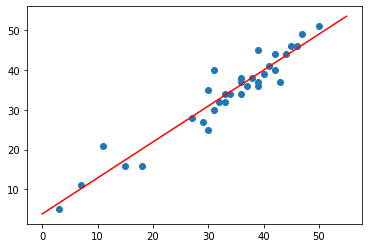

b1= 0.9036432105793232 b0= 3.8296331975887057


In [11]:
# 데이터
x = np.array([3,7,11,15,18,27,29,30,30,31,31,32,33,33,34,36,36, 36,37,38,39,39,39,40,41,42,42,43,44,45,46,47,50])
y = np.array([5,11,21,16,16,28,27,25,35,30,40,32,34,32,34,37,38, 34,36,38,37,36,45,39,41,40,44,37,44,46,46,49,51])

# 식
xbar = np.mean(x)
ybar = np.mean(y)
## theta 구하기
## your code (1 line)##

##

## your code (1 line)##

##

# 회귀 직선 그리기
xfit = np.linspace(0,55,100)
yfit = theta * xfit + b

plt.scatter(x,y)
plt.plot(xfit,yfit,'r')
plt.show()

print('b1=', b1, 'b0=', b0)

## Exercise 1.2

- 위 식을 scikit-learn의 Linear regression 함수를 이용하면 손쉽게 그려줄 수 있다. 

4.241692439297228
0.8919523590182272


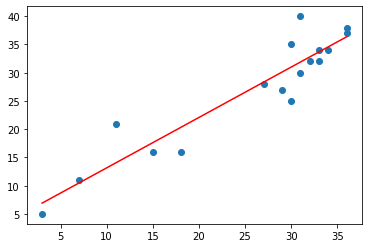

In [13]:
## 데이터
x = np.array([[3],[7],[11],[15],[18],[27],[29],[30],[30],[31],[31],[32],[33],[33],[34],[36],[36]])
y = np.array([[5],[11],[21],[16],[16],[28],[27],[25],[35],[30],[40],[32],[34],[32],[34],[37],[38]])

## LinearRegression의 fit함수 활용
## your code (1 line)##

# 회귀 직선 계수
print(reg.intercept_[0]) # b
print(reg.coef_[0][0]) # theta(slope)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),'r')
plt.show()

## Exercise 2 : MAP 추정 파라미터 

### 2.1 RMSE 구하기<BR>
다항식의 평가에 있어서 RMSE(root-mean-squared-error)를 사용하려고 한다. 이를 먼저 정의하자.

$$
RMSE = \sqrt{ \frac{1}{N} \sum_{n=1}^N (y_n - y^{pred}_n)^2 }
$$

In [16]:
def RMSE(y, ypred):
    ## YOUR CODE (1line)
    # rmse = 
    
    # END Code
    return rmse

### 2.2 Maximum likelihood estimator 정의
우리는 maximum likelihood estimator를 다음과 같이 얻어 낼 수 있습니다.

$$
\theta^{ML} = ( \Phi^T \Phi + \kappa I)^{-1} \Phi^T y
$$

위의 식을 통해 Maximum Likelihood estimator를 정의하자

In [30]:
def nonlinear_features_maximum_likelihood(Phi, y):
    
    kappa = 1e-08 # stability를 위해 추가
    
    D = Phi.shape[1]  
    
    ### Your Code
    Pt = None # Phi^T*y
    PP = None # Phi^T*Phi + kappa*I
        
    # maximum likelihood estimate
    C = scipy.linalg.cho_factor(PP) 
    theta_ml = scipy.linalg.cho_solve(C, Pt) # inv(Phi^T*Phi)*Phi^T*y 
    
    return theta_ml

다음과 같이 $ \phi (x) $ 를 정의하자

$$
\phi (x) = 
\begin{bmatrix}
1 \\
x \\
x^2 \\
x^3 \\
\vdots \\
x^{K-1}
\end{bmatrix}
\subseteq
\mathbb{R}^K
$$


In [18]:
def poly_features(X, K):
    
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, K+1))
    
    # Compute the feature matrix in stages
    for k in range(K+1):
        ### Your Code
        Phi[:,k] = None
    return Phi

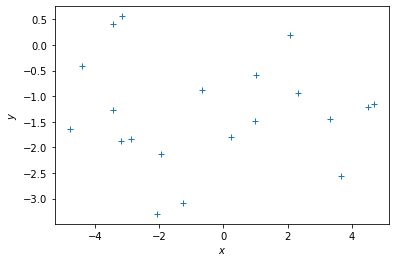

In [19]:
###데이터 생성

def g(x, sigma):
    p = np.hstack([x**0, x**1, np.sin(x)])
    w = np.array([-1.0, 0.1, 1.0]).reshape(-1,1)
    return p @ w + sigma*np.random.normal(size=x.shape) 

sigma = 1.0 
alpha = 1.0 
N = 20

np.random.seed(42)

X = (np.random.rand(N)*10.0 - 5.0).reshape(-1,1)
y = g(X, sigma)

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

### 2.3 MAP 추정 파라미터 정의하기
MAP 추정 파라미터는 다음과 같이 정의 할 수 있습니다. 남은 코드를 채워주세요

$$
\theta^{MAP} = (\Phi^T \Phi + \frac{\sigma^2}{\alpha^2}I)^{-1} \Phi^T y
$$

Hint)

1. $ I $ = np.eye(Phi.shape[1])

In [20]:
def map_estimate_poly(Phi, y, sigma, alpha):
    # Phi: training inputs, Size of N x D
    # y: training targets, Size of D x 1
    # sigma: standard deviation of the noise 
    # alpha: standard deviation of the prior on the parameters
    # returns: MAP estimate theta_map, Size of D x 1
    
    D = Phi.shape[1] 
    
    PP = None #YOUR CODE
    theta_map = scipy.linalg.solve(PP, Phi.T @ y)
    
    return theta_map

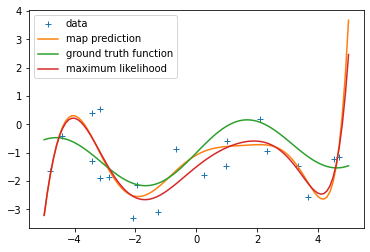

In [21]:
# get the MAP estimate
K = 8 # polynomial degree   


# feature matrix
Phi = poly_features(X, K)

theta_map = map_estimate_poly(Phi, y, sigma, alpha)

# maximum likelihood estimate
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)

Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = g(Xtest, sigma)

Phi_test = poly_features(Xtest, K)
y_pred_map = Phi_test @ theta_map

y_pred_mle = Phi_test @ theta_ml

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred_map)
plt.plot(Xtest, g(Xtest, 0))
plt.plot(Xtest, y_pred_mle)

plt.legend(["data", "map prediction", "ground truth function", "maximum likelihood"])

이제 우리는 앞 서 정의한 RMSE를 활용하여 우리는 MAP가 최대 우도법에서 발견된 OVERFITTING을 얼마나 완화시켰는지 알아볼 수 있다.

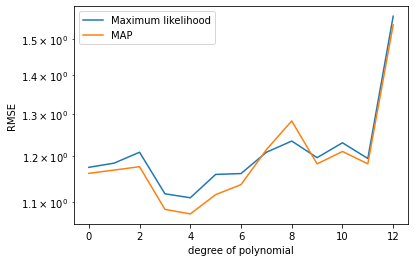

In [22]:
K_max = 12 # this is the maximum degree of polynomial we will consider
assert(K_max < N) # this is the latest point when we'll run into numerical problems

rmse_mle = np.zeros((K_max+1,))
rmse_map = np.zeros((K_max+1,))

for k in range(K_max+1):
   
    
    # feature matrix
    Phi = poly_features(X, k)
    
    # maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
    
    # predict the function values at the test input locations (maximum likelihood)
    y_pred_test = 0*Xtest 
      
    Phi_test = poly_features(Xtest, k)
    
    ypred_test_mle = Phi_test @ theta_ml
    
    
    # RMSE on test set (maximum likelihood)
    rmse_mle[k] = RMSE(ytest, ypred_test_mle)
    
    # MAP estimate
    theta_map = map_estimate_poly(Phi, y, sigma, alpha)

    # Feature matrix
    Phi_test = poly_features(Xtest, k)
    
    # predict the function values at the test input locations (MAP)
    ypred_test_map = Phi_test @ theta_map
    
    # RMSE on test set (MAP)
    rmse_map[k] = RMSE(ytest, ypred_test_map)
    

plt.figure()
plt.semilogy(rmse_mle) # this plots the RMSE on a logarithmic scale
plt.semilogy(rmse_map) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["Maximum likelihood", "MAP"])

## 3. 베이지안 선형회귀(Bayesian linear regression)
### 3.1 사후 분포(Posterior distribution)
posterior distribution은 다음과 같이 구할 수 있다.

$$
\begin{align}
     p(\theta|\mathcal{X}, \mathcal{Y}) = \mathcal{N}(\theta|m_N, S_N) \\
     S_N = (S_0^(-1) + \sigma^(-2)\Phi^T\Phi)^(-1) \\
     m_N = S_N(S_0^(-1)m_0 + \sigma^(-2)\Phi^Ty) \\
\end{align}
$$

<br>
1) 위 식을 사용하여 training set에 대한 $ m_N, s_N $ 을 구하는 posterior distribution 함수를 정의한다. <br>
2) 정의한 함수를 사용하여 test set에 대한 posterior prediction을 진행하고자 한다. <br>
3) 최종적으로 test set에 대한 Bayes linear regression 의 결과를 관찰한다. <br><br>



Posterior distribution을 구하기 위해 필요한 Training dataset과 prior vairiance 및 noise variance는 다음과 같다.

In [23]:
prior_var = 2.0 # variance of the parameter prior (alpha^2). We assume this is known.
noise_var = 1.0 # noise varianc`e (sigma^2). We assume this is known.

pol_deg = 3 # degree of the polynomial we consider at the moment

Ntrain = 10
Xtrain = np.random.uniform(high=5, low=-5, size=(Ntrain,1)) # training inputs, size Nx1
y = g(X, np.sqrt(noise_var)) # training targets, size Nx1

위 정보들을 활용하여 posterior distribution의 mean와 variance를 구하는 함수는 다음과 같다. 

In [24]:
def post_dist(Xtrain, y, K, prior_var, noise_var):
    # Xtrain: training inputs, size N x D
    # y: training targets, size N x 1
    # K: degree of polynomial we consider
    # prior_var: prior variance of the parameter distribution
    # sigma: noise variance
    
    jitter = 1e-08 # increases numerical stability
    
    Phi = poly_features(Xtrain, K) # N x (K+1) feature matrix 
    
    Pt = Phi.T @ y # Phi*y, size (K+1,1)
    PP = Phi.T @ Phi + jitter*np.eye(K+1) # size (K+1, K+1)
    
    # parameter posterior
    iSN = (np.eye(K+1)/prior_var + PP/noise_var) # posterior precision
    SN = scipy.linalg.pinv(noise_var*np.eye(K+1)/prior_var + PP)*noise_var  # posterior covariance
    mN = scipy.linalg.solve(iSN, Pt/noise_var) # posterior mean
    
    return (mN, SN)

위 함수를 활용하여 posterior distribution의 파라미터 mean와 파라미터 variance 를 구한다.

In [25]:
### START CODE HERE (1 line)
theta_mean, theta_var = 
### END CODE HERE

### 3.2 사후 예측(Posterior Prediction)
posterior predictive distribution은 다음과 같이 구할 수 있다.

![ex_screenshot](./Formula.png)

앞서 구한 posterior distribution의 mean과 variance를 사용하여 test set에 대한 posterior prediction을 진행하도록 한다.

In [26]:
# Test inputs
Ntest = 200
Xtest = np.linspace(-5, 5, Ntest).reshape(-1,1) # test inputs

In [27]:
# predictive distribution (Bayesian linear regression)

Phi_test = poly_features(Xtest, pol_deg) # N x (K+1)

# mean prediction
### START CODE HERE (1 line)
mean_blr = Phi_test @ theta_mean
### END CODE HERE

# variance prediction

### START CODE HERE (1 line)

### END CODE HERE


앞서 testset에 대한 Posterior prediction의 결과는 다음과 같이 확인할 수 있다. 

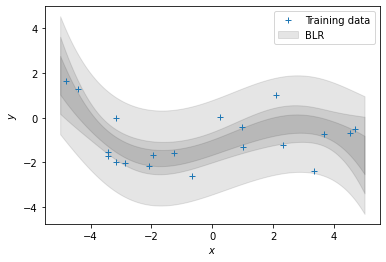

In [28]:
# plot the posterior
plt.figure()
plt.plot(X, y, "+")
var_blr = np.diag(cov_blr)
conf_bound1 = np.sqrt(var_blr).flatten()
conf_bound2 = 2.0*np.sqrt(var_blr).flatten()
conf_bound3 = 2.0*np.sqrt(var_blr + sigma).flatten()

plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound1, 
                 mean_blr.flatten() - conf_bound1, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound2, 
                 mean_blr.flatten() - conf_bound2, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound3, 
                 mean_blr.flatten() - conf_bound3, alpha = 0.1, color="k")
plt.legend(["Training data","BLR"])
plt.xlabel('$x$');
plt.ylabel('$y$');